## **Southeast Asia Covid-19 Data Exploration and Analysis**
<hr style="margin-bottom: 15px;">

![covid gif](https://i.imgur.com/WQnKe72.gif)

<a id='intro'></a>

In this project, I would like to explore, analyze, and visualize COVID-19 data in Southeast Asia (SEA) countries using the dataset acquired from the World Health Organization ([WHO-COVID-19-globaldata](https://covid19.who.int/data)), combined with other datasets from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)

In this context, Southeast Asia is a geographical region located in the southeastern part of the Asian continent, consisting of ten nations: Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, the Philippines, Singapore, Thailand, and Vietnam. This region is characterized by its rich diversity of cultures, values, and economic status. It is home to approximately 688 million people

The main goal of this project is to perform a thorough COVID-19 analysis in Southeast Asia as part of my personal learning journey in data analytics

> **Disclaimer:** The data and analysis provided in this project are intended for educational and personal learning purposes only. For the most accurate and up-to-date information regarding COVID-19 in Southeast Asia, it is crucial to consult official health authorities such as the World Health Organization (WHO) and local health agencies. Please note that this analysis should not be used as a substitute for professional medical advice or decision-making. Any decisions or actions made based on this analysis are the sole discretion and responsibility of the user. Open discussions and feedback are encouraged

### Table of Contents

- [Introduction ~](#intro)
- [Questions ~](#question)
- [How to run the code ~](#runcode)
- [Downloading the Dataset ~](#download)
- [Create the Dataframes ~](#dataframe)
- [Data cleaning and wrangling ~](#clean)
- [Analysis and Visualizations~](#analysis)
- [Summary ~](#summary)
- [References ~](#reference)
  

<a id='question'></a>
### Questions ~
Here is the list of questions that we will try to answer throughout this project:

1. **What is the overall trend of COVID-19 cases in Southeast Asia over time?**
2. **How do the COVID-19 trends differ among Southeast Asian countries?**
3. **How do Southeast Asia countries differ in terms of infection and severity rates?**
4. **What is the impact of vaccination rates on new cases and new deaths across Southeast Asia countries?**
5. **Are there significant correlations between healthcare indicators (number of physicians, life expectancy, out of health pocket health expenditure) and COVID-19 death rates?**

<a id='runcode'></a>
### How to run the code ~

To run this project, there are several ways that you can choose between running it on your local computer using [Jupyter Notebook]() or using online resources like [Kaggle](https://www.kaggle.com) or [GoogleCollab](https://colab.research.google.com)

**Option 1: Using online resources(recommended)**:
- This is the easiet way since you only need to click the 'Run' button
- You can choose between [GoogleCollab](https://colab.research.google.com/) or [Kaggle](https://www.kaggle.com), but first you need to have an account before you upload and execute the code on those platform
  

**Option 2: Running on you local computer**:
- You need to set up Python, install the [Jupyter Notebook](https://jupyter.org/) and install the list of required libraries within your IDE
> **Jupyter Notebooks**: [Jupyter notebook](https://jupyter.org) is a document made of *cells*. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top

Here's a list of tools or libraries that we're going to install and use:

In [ ]:
%pip install pandas --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet
%pip install opendatasets --quiet
%pip install scipy --quiet
%pip install statsmodels --quiet

For starter, let's start with importing the libraries and modules

In [1]:
import pandas as pd
import numpy as np
import opendatasets as od
import scipy.stats as stats
import statsmodels.api as sm
from urllib.request import urlretrieve
import viz 

<a id='download'></a>
### Downloading the Datasets ~

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download


1. **Main Dataset (WHO-COVID-19-globaldata):**
   - You can access our main dataset by visiting the provided URL: [WHO-COVID-19-globaldata](https://covid19.who.int/data).
   - To download it, use the `urlretrieve` function

2. **Additional Datasets (Kaggle):**
   - For the additional datasets, you'll find them on [Kaggle](https://www.kaggle.com/)
   - If you haven't already, make sure you have a Kaggle account. You can create one if needed
   - After logging in, go to your Kaggle account settings by clicking on "Settings" in the top right corner of the Kaggle website
   - In the account settings, navigate to "Account" and then click on "Create New API Token." This will provide you with an API key

     > Please ensure you've acquired the API key from Kaggle as mentioned above before proceeding to download the datasets



Let's download the datasets

In [ ]:
dataset_url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

urlretrieve(dataset_url, 'WHO-COVID-19-global-data.csv')

In [ ]:
dataset_url2 = 'https://www.kaggle.com/datasets/rsrishav/covid-vaccination-dataset/data?select=vaccinations.csv'

od.download(dataset_url2)

  ········


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 3.53M/3.53M [00:01<00:00, 2.42MB/s]


In [ ]:
dataset_url3 = 'https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023'

od.download(dataset_url3)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 23.5k/23.5k [00:00<00:00, 710kB/s]

<a id='datframe'></a>
### Create the Dataframes ~

We create our dataframes with ``pandas``:
   - As all of our dataset are in ``CSV`` format, let's use pandas `read_csv` function to create the dataframe

In [2]:
covid_df = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates = ['Date_reported'])

vaccinations_df = pd.read_csv('covid-vaccination-dataset/vaccinations.csv', parse_dates=['date'])

world_data_df = pd.read_csv('countries-of-the-world-2023/world-data-2023.csv')

# Checking all columns name in the all dataframes above
print(' Columns '.center(100, '='))
print('covid_df:')
print(','.join(covid_df.columns))
print('\nvaccinations_df:')
print(', '.join(vaccinations_df.columns)) 
print('\nworld_data_df:')
print(', '.join(world_data_df.columns))

============================================= Columns ==============================================
covid_df:
Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths

vaccinations_df:
location, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, daily_vaccinations_raw, daily_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, daily_vaccinations_per_million, daily_people_vaccinated, daily_people_vaccinated_per_hundred

world_data_df:
Country, Density
(P/Km2), Abbreviation, Agricultural Land( %), Land Area(Km2), Armed Forces size, Birth Rate, Calling Code, Capital/Major City, Co2-Emissions, CPI, CPI Change (%), Currency-Code, Fertility Rate, Forested Area (%), Gasoline Price, GDP, Gross primary education enrollment (%), Gross tertiary education enrollment (%), Infant mortality, Largest city, Life expectancy, M

- Merging our datasets into one dataframe using pandas function ``merge``

In [3]:
# Merging the covid_df and world_data first, then vaccinations_df
merged_df1 = pd.merge(covid_df[['Date_reported', 'Country_code', 'Cumulative_cases', 'New_cases', 'Cumulative_deaths', 'New_deaths']],
                   world_data_df[['Abbreviation', 'Country', 'Density\n(P/Km2)', 'Life expectancy', 'Out of pocket health expenditure', 'Physicians per thousand', 'Urban_population']],
                   left_on='Country_code', right_on='Abbreviation', how='inner')

merge_df2 = pd.merge(merged_df1, vaccinations_df[['date', 'location', 'people_vaccinated_per_hundred']],
                   left_on=['Country', 'Date_reported'], right_on=['location', 'date'], how='left')

# Print all columns in the dataframe
print('Columns: ', ', '.join(merge_df2.columns))

Columns:  Date_reported, Country_code, Cumulative_cases, New_cases, Cumulative_deaths, New_deaths, Abbreviation, Country, Density
(P/Km2), Life expectancy, Out of pocket health expenditure, Physicians per thousand, Urban_population, date, location, people_vaccinated_per_hundred



- Although the current column order is functional, it doesn't align with my preferences. The columns name also didn't follow the same format, so let's make some adjustments to it

In [4]:
main_df = merge_df2[['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths',
                     'people_vaccinated_per_hundred', 'Physicians per thousand', 'Life expectancy', 'Out of pocket health expenditure', 
                     'Density\n(P/Km2)', 'Urban_population']].reset_index()

# Define a dictionary mapping old column names to new column names
column_name = {'Date_reported': 'date', 
               'Country_code': 'country_code', 
               'Country': 'country_name', 
               'New_cases': 'daily_new_cases', 
               'Cumulative_cases': 'total_cases', 
               'New_deaths': 'daily_new_deaths', 
               'Cumulative_deaths': 'total_deaths', 
               'people_vaccinated_per_hundred': 'vaccination_rate', 
               'Physicians per thousand': 'physicians_per_thousand', 
               'Life expectancy': 'life_expectancy',
               'Out of pocket health expenditure': 'out_of_pocket_health_expenditure',
               'Density\n(P/Km2)': 'population_density_per_km2', 
               'Urban_population': 'urban_population'}

# Rename the columns using the dictionary above
main_df.rename(columns=column_name, inplace=True)

print('Columns: ', ', '.join(main_df.columns))

Columns:  index, date, country_code, country_name, daily_new_cases, total_cases, daily_new_deaths, total_deaths, vaccination_rate, physicians_per_thousand, life_expectancy, out_of_pocket_health_expenditure, population_density_per_km2, urban_population


<a id='clean'></a>
### Data cleaning and wrangling ~

In [5]:
# Create a function for checking shape, datatypes, and missing value of the dataframe
def dataframe_info(dataframe):
    print(' Shape '.center(75, '='))
    print(f'\n{"Columns":<40}{dataframe.shape[1]:>35}')
    print(f'{"Rows":40}{dataframe.shape[0]:>35}\n')
    print(' Datatypes '.center(75, '='))
    print('')
    for column, dtype in dataframe.dtypes.items():
        print(f'{column:40}{str(dtype):>35}')
    print('')
    print(' Missing Values '.center(75, '='))
    print('')
    missing_values = pd.isnull(dataframe).sum()
    for column, count in missing_values.items():
        print(f'{column:40}{count:>35}')

# Pass our dataframe as an argument for the dataframe
dataframe_info(main_df)

================================== Shape ==================================

Columns                                                                  14
Rows                                                                 268905

================================ Datatypes ================================

index                                                                 int64
date                                                         datetime64[ns]
country_code                                                         object
country_name                                                         object
daily_new_cases                                                       int64
total_cases                                                           int64
daily_new_deaths                                                      int64
total_deaths                                                          int64
vaccination_rate                                                    float64
physician

- As displayed above, the ``out_of_pocket_health_expenditure``, ``population_density_per_km2``, ``Urban_population``, and ``population`` column currently has values stored as text (string-object dataype) instead of numbers. Meanwhile, the ``vaccination_rate``, ``physicians_per_thousand``, ``life_expectancy``, ``out_of_pocket_health_expenditure``, and ``urban_population`` column show that some data is missing
- To work with the data effectively, we need to make a few changes. Firstly by fill in the ``vaccination_rate`` column missing value with previous value or 0 if there isn't any, and then fill with 0 for missing value in ``physicians_per_thousand``, ``life_expectancy``, ``out_of_pocket_health_expenditure``, and ``urban_population`` column
- And for columns with string-object datatype, we can start by removing any unwanted characters and then convert it to a ``int32`` or ``float32`` datatype

In [6]:
# Fill missing values with forward fill and 0 fill
main_df.sort_values(by=['country_name', 'date'], inplace=True)
main_df['vaccination_rate'] = main_df.groupby('country_name')['vaccination_rate'].ffill().fillna(0)

# Removing minus values and change it to 0
main_df['daily_new_cases'] = main_df['daily_new_cases'].apply(lambda x: 0 if x < 0 else x)
main_df['daily_new_deaths'] = main_df['daily_new_deaths'].apply(lambda x: 0 if x < 0 else x)

In [7]:
# Create a function to remove non-numeric characters
def clean_numeric_value(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace(' ', '').replace('?', '').replace('%', '')
        return int(value) if value.isdigit() else float(value)
    return value

# Columns that we're going to change their datatype
columns_data_types = {'daily_new_cases': 'int32',
                      'total_cases': 'int32',
                      'daily_new_deaths': 'int32',
                      'total_deaths': 'int32',
                      'population_density_per_km2': 'int32',
                      'urban_population': 'int32',
                      'vaccination_rate': 'float32',
                      'physicians_per_thousand': 'float32',
                      'life_expectancy': 'float32',
                      'out_of_pocket_health_expenditure': 'float32'}

# Apply the function above and change the datatype into int32 or float32 for better memory usage
for column, data_type in columns_data_types.items():
    main_df[column] = main_df[column].apply(clean_numeric_value).fillna(0).astype(data_type)

In [8]:
dataframe_info(main_df)

================================== Shape ==================================

Columns                                                                  14
Rows                                                                 268905

================================ Datatypes ================================

index                                                                 int64
date                                                         datetime64[ns]
country_code                                                         object
country_name                                                         object
daily_new_cases                                                       int32
total_cases                                                           int32
daily_new_deaths                                                      int32
total_deaths                                                          int32
vaccination_rate                                                    float32
physician

<a id='analysis'></a>
### Analysis and Visualizations ~

1. **What is the overall trend of COVID-19 in Southeast Asia?**
   
   - As to answer this question let's take a look of total and new cases and deaths over time. We also need to use Moving Average to see the projection more clearly because it's reducing the noises in our data
   - Calculate the central tendency and visualize the distribution of new cases and new deaths

In [9]:
# Here a list of Southeast Asia countries
sea_countries = ['Brunei', 'Cambodia', 'Indonesia','Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

sea_covid_df = main_df.loc[main_df['country_name'].isin(sea_countries)]

# Checking list of countries in dataframe
sea_covid_df['country_name'].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam'], dtype=object)

- To look the overall trend in Southeast Asia overtime, we should create a dataframe which consist new and total of both cases and deaths for each ``date``

In [10]:
# Create the dataframe with groupby
sea_cases_and_deaths_df = sea_covid_df.groupby('date')[['daily_new_cases', 'total_cases', 
                                                        'daily_new_deaths', 'total_deaths']].sum().reset_index()

# Set index to date column
sea_cases_and_deaths_df.set_index('date', inplace=True)

sea_cases_and_deaths_df.sample(3)

,daily_new_cases,total_cases,daily_new_deaths,total_deaths
date,,,,
2022-04-24,33743,31166251,181,347156
2022-09-05,10734,34173380,104,356417
2021-06-03,25803,4098256,537,80239


 - What is the total and all-time high of COVID-19 new cases and deaths in Southeast Asia?

In [11]:
# Find the maximum of total cases and new cases
max_total_cases = sea_cases_and_deaths_df['total_cases'].max()
max_new_cases = sea_cases_and_deaths_df['daily_new_cases'].max()

# Retrieve the date from each maximum new cases and total cases
max_total_cases_date = sea_cases_and_deaths_df[sea_cases_and_deaths_df['total_cases'] == max_total_cases].index[0].date()
max_new_cases_date = sea_cases_and_deaths_df[sea_cases_and_deaths_df['daily_new_cases'] == max_new_cases].index[0].date()

# Do it again with total deaths and new deaths
max_total_deaths = sea_cases_and_deaths_df['total_deaths'].max()
max_new_deaths = sea_cases_and_deaths_df['daily_new_deaths'].max()

# Retrieve the date
max_total_deaths_date = sea_cases_and_deaths_df[sea_cases_and_deaths_df['total_deaths'] == max_total_deaths].index[0].date()
max_new_deaths_date = sea_cases_and_deaths_df[sea_cases_and_deaths_df['daily_new_deaths'] == max_new_deaths].index[0].date()


print(' Southeast Asia COVID-19 Cases '.center(75, '='))
print('\nTotal cases:')
print(f'{max_total_cases:,} cases per {max_total_cases_date}\n')
print('All-time high of daily new cases:')
print(f'{max_new_cases:,} new cases a day in {max_new_cases_date}\n')
print(' Southeast Asia COVID-19 Deaths '.center(75, '='))
print('\nTotal deaths:')
print(f'{max_total_deaths:,} deaths per {max_total_deaths_date}\n')
print('All-time high of daily new deaths:')
print(f'{max_new_deaths:,} new deaths a day in {max_new_deaths_date}')

====================== Southeast Asia COVID-19 Cases ======================

Total cases:
36,359,535 cases per 2023-10-08

All-time high of daily new cases:
536,687 new cases a day in 2022-03-12

====================== Southeast Asia COVID-19 Deaths =====================

Total deaths:
368,750 deaths per 2023-10-07

All-time high of daily new deaths:
3,201 new deaths a day in 2021-08-10


- Lineplot from `Matplotlib` and `Seaborn` is the visualization we're going to use

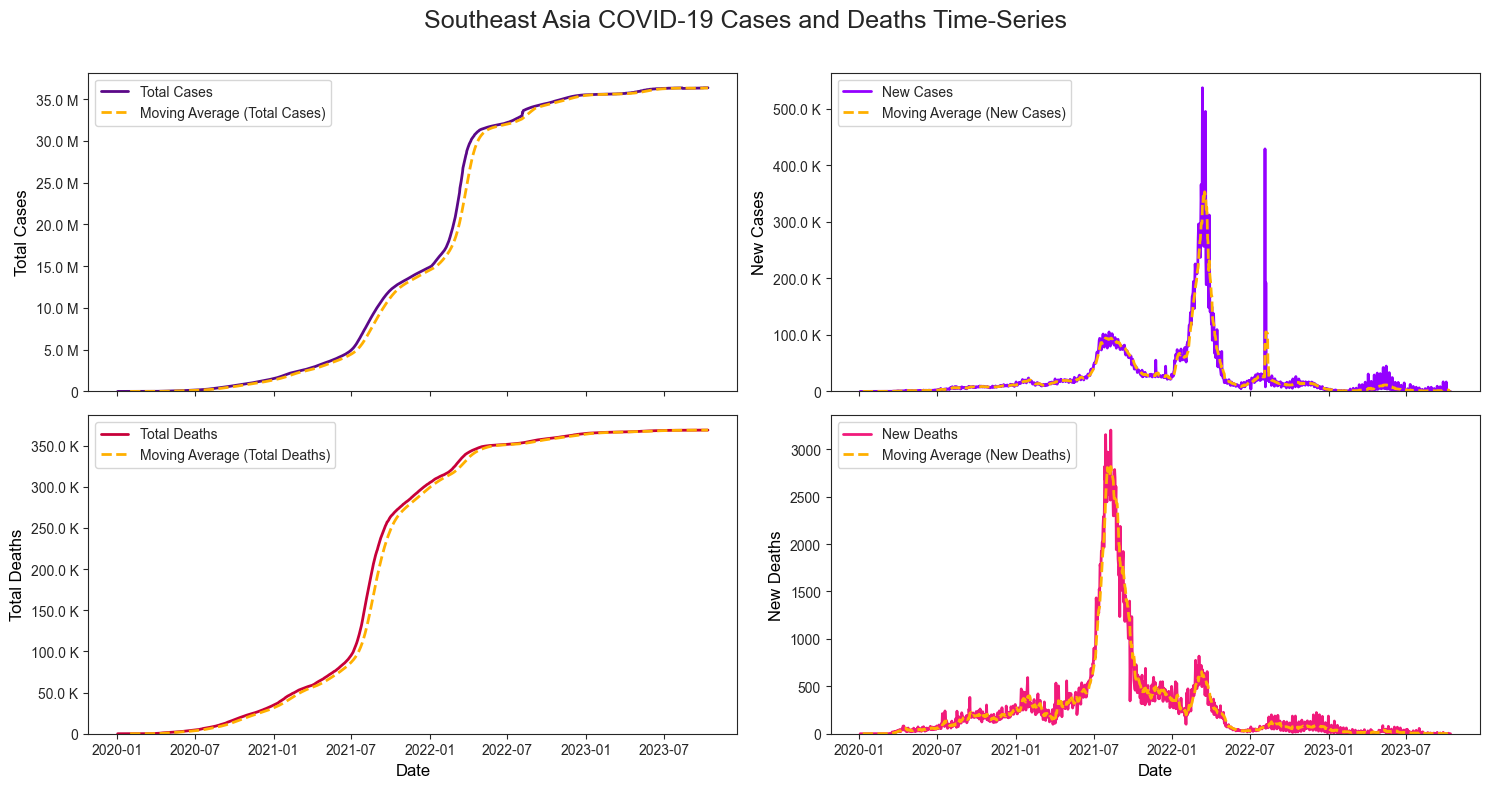

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Common window sizes for moving average
window_sizes = {'total_cases': 30,    # 30 days or per month
                'daily_new_cases': 7, # 7 days or per week
                'total_deaths': 30,
                'daily_new_deaths': 7}

plot_data = [
    (axs[0, 0], 'total_cases', 'moving_avg(total_cases)', 'Total Cases', '#5B0888'),
    (axs[0, 1], 'daily_new_cases', 'moving_avg(daily_new_cases)', 'New Cases', '#9400FF'),
    (axs[1, 0], 'total_deaths', 'moving_avg(total_deaths)', 'Total Deaths', '#C70039'),
    (axs[1, 1], 'daily_new_deaths', 'moving_avg(daily_new_deaths)', 'New Deaths', '#F11A7B')
]

# Calculate moving averages for each column
for column, window_size in window_sizes.items():
    sea_cases_and_deaths_df[f'moving_avg({column})'] = sea_cases_and_deaths_df[column].rolling(window=window_size).mean()

# Create line plots
for i, (ax, ycolumn, moving_avg_column, label, color) in enumerate(plot_data):
    viz.line_subplotting(ax, sea_cases_and_deaths_df, 'date', ycolumn, moving_avg_column, label, color, 2, 12)

# Set overall title
fig.suptitle('Southeast Asia COVID-19 Cases and Deaths Time-Series\n', fontsize=18)
plt.tight_layout()

- What is the central tendency of COVID-19 new cases and deaths in Southeast Asia?

In [13]:
# Create a summary of descriptive statistics from daily_new_cases and daily_new_deaths
sea_cases_summary = sea_cases_and_deaths_df['daily_new_cases'].describe()
sea_deaths_summary = sea_cases_and_deaths_df['daily_new_deaths'].describe()

print(' Southeast Asia COVID-19 Cases and Deaths Central Tendency '.center(75, '='))
print(f'\n{"Mean":>27}{"Median":>21}{"Standard Dev.":>26}')
print(f'\n{"Cases":<10}{sea_cases_summary["mean"]:>20,.3f}{sea_cases_summary["50%"]:>20,.3f}{sea_cases_summary["std"]:>25,.3f}')
print(f'{"Deaths":<10}{sea_deaths_summary["mean"]:>20,.3f}{sea_deaths_summary["50%"]:>20,.3f}{sea_deaths_summary["std"]:>25,.3f}')

======== Southeast Asia COVID-19 Cases and Deaths Central Tendency ========

                       Mean               Median             Standard Dev.

Cases               26,413.817          10,734.000               51,643.719
Deaths                 267.500              92.000                  483.310


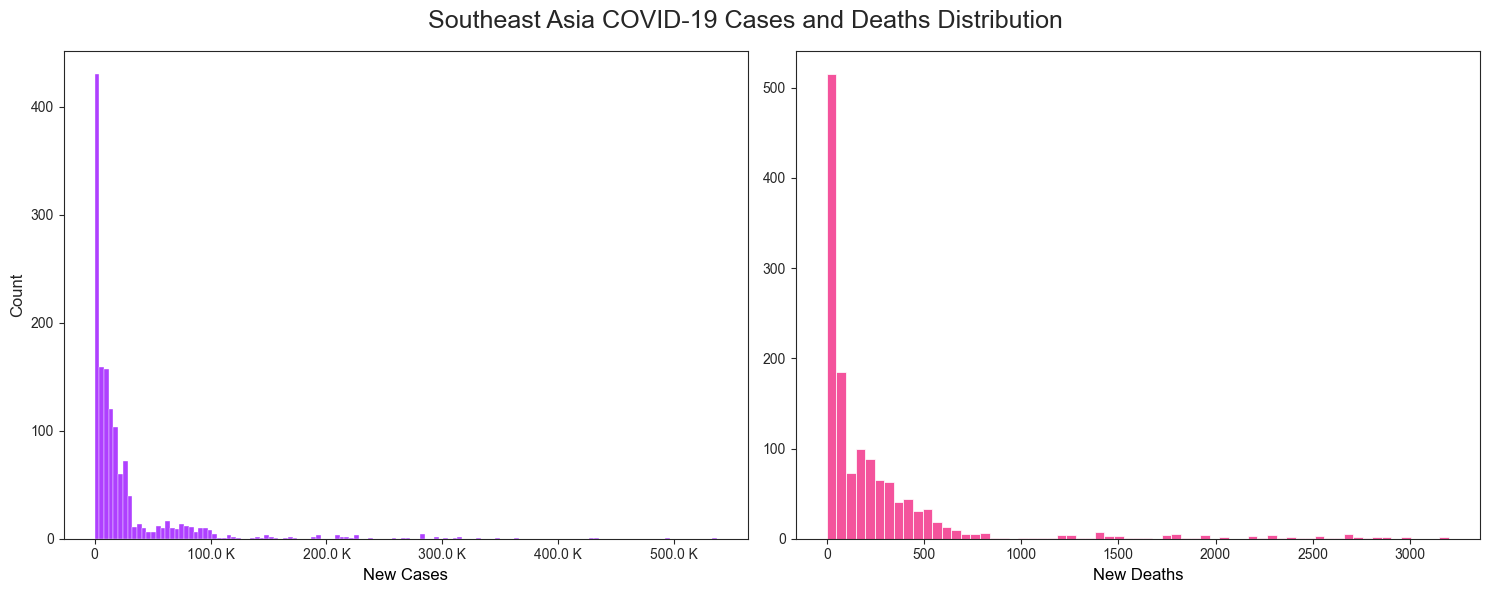

In [14]:
# Create a figure with 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Apply the function above
viz.hist_subplotting(axs[0], sea_cases_and_deaths_df, 'daily_new_cases', 'New Cases', '#9400FF', 12)
viz.hist_subplotting(axs[1], sea_cases_and_deaths_df, 'daily_new_deaths', 'New Deaths', '#F11A7B', 12)

axs[1].set_ylabel('')

# Set overall title
fig.suptitle('Southeast Asia COVID-19 Cases and Deaths Distribution', fontsize=18)

# Tight layout
plt.tight_layout()

2. **How do the COVID-19 trends differ among Southeast Asian countries?**

   - To address this question, let's analyze the total and highest daily numbers of new cases and deaths for each country and visualize them using an area chart, plotting only the moving average of the provided values
   - Determine the central tendencies of new cases and deaths for each country

- Which country has the most cases and which country has the highest daily new cases? 

In [15]:
# Find the maximum value of daily_new_cases, total_cases, daily_new_deaths, and total_deaths column for each country
sea_country_max = sea_covid_df.groupby('country_name')[['daily_new_cases', 'total_cases', 'daily_new_deaths', 'total_deaths']].max()

# Total cases and highest daily new cases for each country
country_total_cases = sea_country_max['total_cases'].sort_values(ascending=False)
country_max_new_cases = sea_country_max['daily_new_cases'].sort_values(ascending=False)

# Showing each country total and highest daily new cases sorted by hi
print(' Southeast Asia COVID-19 Cases by Country '.center(75, '='))
print('\nTotal Cases:')
for country, total_cases in country_total_cases.items():
    print(f'{country:<30}{total_cases:>45,}')
print('')
print('All-time high of daily new cases:')
for country, new_cases in country_max_new_cases.items():
    print(f'{country:<30}{new_cases:>45,}')

================= Southeast Asia COVID-19 Cases by Country ================

Total Cases:
Vietnam                                                          11,623,845
Indonesia                                                         6,813,429
Malaysia                                                          5,129,131
Thailand                                                          4,757,604
Philippines                                                       4,173,631
Singapore                                                         2,610,108
Myanmar                                                             641,307
Brunei                                                              311,614
Laos                                                                218,876
Cambodia                                                            138,941

All-time high of daily new cases:
Vietnam                                                             454,212
Indonesia                              

- Vietnam currently leads Southeast Asia with the highest number of COVID-19 cases, over 11 million, while Cambodia has the lowest, around 138,000 cases in total
- Given the wide range of values, it is difficult to visualise the data effectively. Let's divide the countries into two groups, the top 5 and the bottom 5, both for total cases and for daily new cases


In [16]:
# Let's divide it by two category which are 5 highest and 5 lowest
top5_total_cases = country_total_cases.head(5)
bottom5_total_cases = country_total_cases.tail(5)

# Do it again with daily new cases
top5_new_cases = country_max_new_cases.head(5)
bottom5_new_cases = country_max_new_cases.tail(5)

- The area chart is the type of plot that we are going to use for visualisation

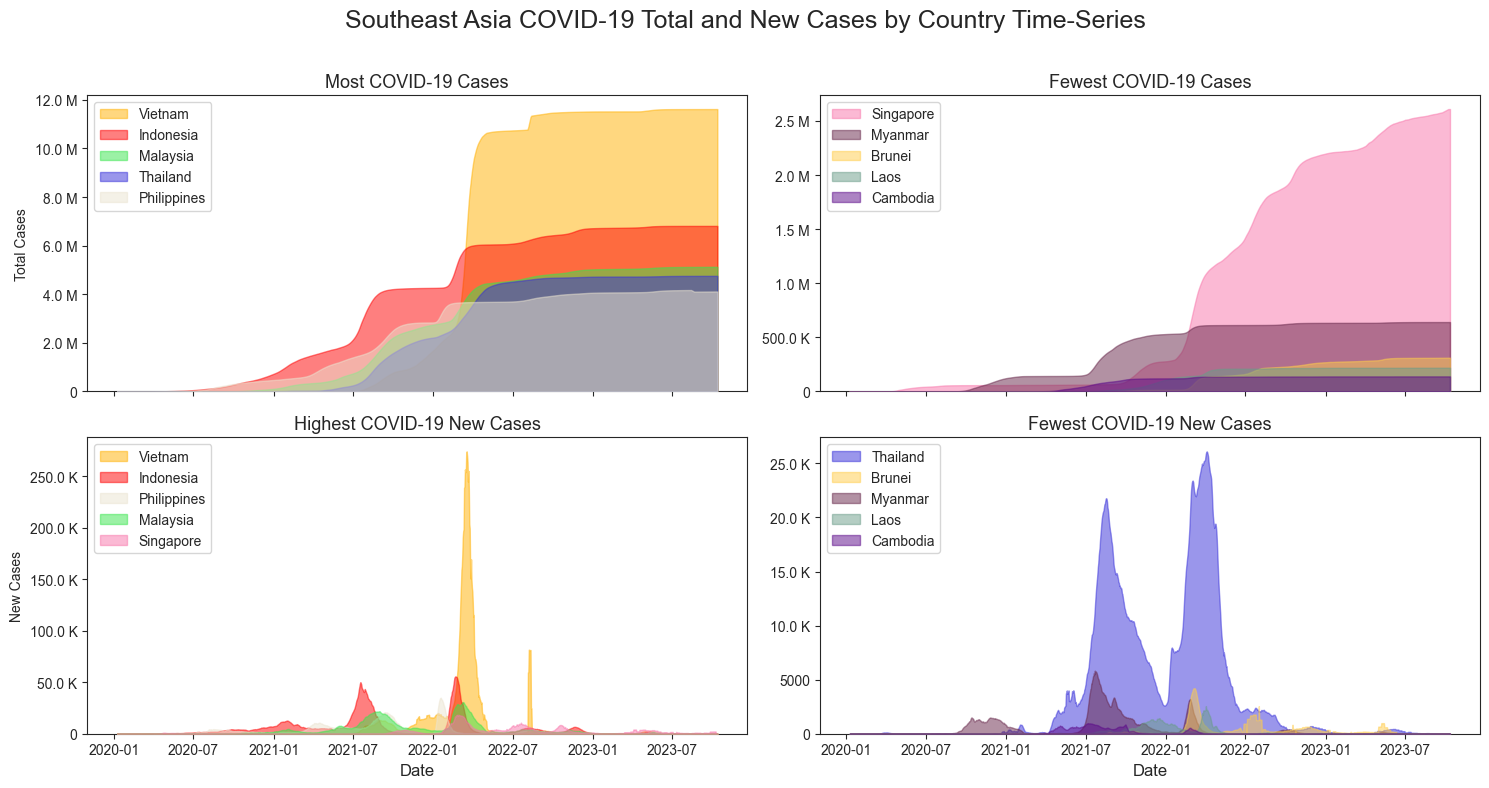

In [17]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Define colors for each country
country_color = {'Cambodia': '#5B0888', 'Brunei': '#FFCD4B', 'Indonesia': '#FE0000', 'Malaysia': '#38E54D', 'Singapore': '#F875AA',
                 'Thailand': '#362FD9', 'Myanmar': '#662549', 'Laos': '#6A9C89', 'Vietnam': '#FFB000', 'Philippines': '#EBE4D1'}

plot_data = [(axs[0, 0], 'total_cases', top5_total_cases, country_color, max_total_cases), # Plot top 5 total cases
             (axs[0, 1], 'total_cases', bottom5_total_cases, country_color, max_total_cases), # bottom 5 total cases
             (axs[1, 0], 'daily_new_cases', top5_new_cases, country_color, max_new_cases), # top 5 daily new cases
             (axs[1, 1], 'daily_new_cases', bottom5_new_cases, country_color, max_new_cases)] # bottom 5 daily new cases

for i, (ax, ycolumn, plot_value, color, max_value) in enumerate(plot_data):
    viz.area_subplotting(ax, sea_covid_df, 'country_name', 'date', ycolumn, plot_value, color, max_value, 0.5)

# Set labels and title for total cases
axs[0, 0].set_ylabel('Total Cases')
axs[0, 1].set_ylabel('')
axs[0, 0].set_title('Most COVID-19 Cases', fontsize=13)
axs[0, 1].set_title('Fewest COVID-19 Cases', fontsize=13)


# Set labels and title for new cases
axs[1, 0].set_ylabel('New Cases')
axs[1, 1].set_ylabel('')
axs[1, 0].set_title('Highest COVID-19 New Cases', fontsize=13)
axs[1, 1].set_title('Fewest COVID-19 New Cases', fontsize=13)

# Set x-label for the bottom row
axs[1, 0].set_xlabel('Date', fontsize=12)
axs[1, 1].set_xlabel('Date', fontsize=12)

plt.ylim(bottom=0)

# Set title
fig.suptitle('Southeast Asia COVID-19 Total and New Cases by Country Time-Series\n', fontsize=18)

# Tight layout of the plot
plt.tight_layout()

- Which country has the most deaths by Covid-19, and which has the highest daily new deaths? 

In [18]:
# Total deaths and highest daily new deaths for each country
country_total_deaths = sea_country_max['total_deaths'].sort_values(ascending=False)
country_max_new_deaths = sea_country_max['daily_new_deaths'].sort_values(ascending=False)

# Showing each country total and highest daily new cases
print(' Southeast Asia Covid-19 Deaths by Country '.center(75, '='))
print('\nTotal Deaths:')
for country, total_deaths in country_total_deaths.items():
    print(f'{country:<30}{total_deaths:>45,}')
print('')
print('All-time high of daily new deaths:')
for country, new_deaths in country_max_new_deaths.items():
    print(f'{country:<30}{new_deaths:>45,}')

================ Southeast Asia Covid-19 Deaths by Country ================

Total Deaths:
Indonesia                                                           161,918
Philippines                                                          66,696
Vietnam                                                              43,206
Malaysia                                                             37,195
Thailand                                                             34,479
Myanmar                                                              19,494
Cambodia                                                              3,056
Singapore                                                             1,872
Laos                                                                    671
Brunei                                                                  163

All-time high of daily new deaths:
Indonesia                                                             2,069
Vietnam                              

- As shown above, Indonesia has the highest number of COVID-19 deaths in Southeast Asia, surpassing 161,900 deaths, while Brunei reports the lowest count at 163 deaths


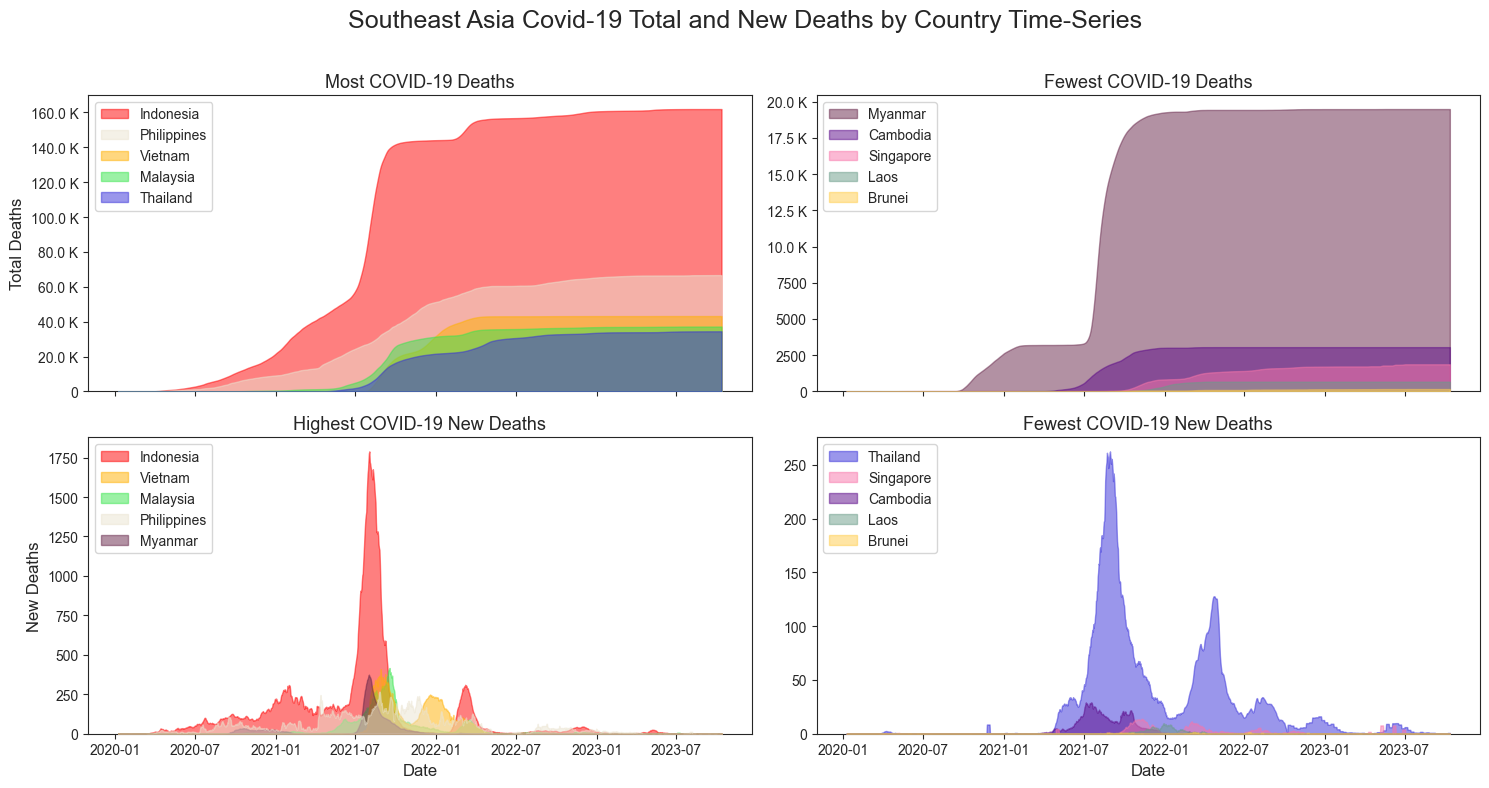

In [19]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Category for 5 highest and 5 lowest
top5_total_deaths = country_total_deaths.head(5)
bottom5_total_deaths = country_total_deaths.tail(5)
top5_new_deaths = country_max_new_deaths.head(5)
bottom5_new_deaths = country_max_new_deaths.tail(5)

# Calculate the maximum values for z-order (which determines if the area value should be in front or behind)
max_total_deaths = max(top5_total_deaths.max(), bottom5_total_deaths.max())
max_new_deaths = max(top5_new_deaths.max(), bottom5_new_deaths.max())

plot_data = [(axs[0, 0], 'total_deaths', top5_total_deaths, country_color, max_total_deaths), # plot top 5 total deaths
             (axs[0, 1], 'total_deaths', bottom5_total_deaths, country_color, max_total_deaths), # bottom 5 total deaths
             (axs[1, 0], 'daily_new_deaths', top5_new_deaths, country_color, max_new_deaths), # top 5 daily new deaths
             (axs[1, 1], 'daily_new_deaths', bottom5_new_deaths, country_color, max_new_deaths)] # bottom 5 daily new deaths

for i, (ax, ycolumn, plot_value, color, max_value) in enumerate(plot_data):
    viz.area_subplotting(ax, sea_covid_df, 'country_name', 'date', ycolumn, plot_value, color, max_value, 0.5)

axs[0, 0].set_ylabel('Total Deaths', fontsize=12)
axs[0, 1].set_ylabel('')
axs[0, 0].set_title('Most COVID-19 Deaths', fontsize=13)
axs[0, 1].set_title('Fewest COVID-19 Deaths', fontsize=13)

    
axs[1, 0].set_ylabel('New Deaths', fontsize=12)
axs[1, 1].set_ylabel('')
axs[1, 0].set_title('Highest COVID-19 New Deaths', fontsize=13)
axs[1, 1].set_title('Fewest COVID-19 New Deaths', fontsize=13)

# Set x-label for the bottom row
axs[1, 0].set_xlabel('Date', fontsize=12)
axs[1, 1].set_xlabel('Date', fontsize=12)

# Set y-axis limit to zero
plt.ylim(bottom=0)

# Set title
fig.suptitle('Southeast Asia Covid-19 Total and New Deaths by Country Time-Series\n', fontsize=18)

# Show the plot
plt.tight_layout()

- What is the central tendency of COVID-19 cases and deaths in each Southeast Asia countries?

In [20]:
sea_country_data = {country: sea_covid_df.loc[sea_covid_df['country_name'] == country] for country in sea_countries}

# Creata a dictionary to store the result of daily_new_csases summary from each country
sea_country_cases_summary = {}

for country in sea_countries:
    country_data = sea_country_data[country]
    cases_summary = country_data['daily_new_cases'].describe()
    sea_country_cases_summary[country] = cases_summary

# Create another for daily_new_deaths
sea_country_deaths_summary = {}

for country in sea_countries:
    country_data = sea_country_data[country]
    deaths_summary = country_data['daily_new_deaths'].describe()
    sea_country_deaths_summary[country] = deaths_summary

In [21]:
# Print the cases central tendency
print(' Southeast Asia COVID-19 Cases Central Tendency by SEA Country '.center(75, '='))
print(f'\n{"Country":<15}{"Mean":>12}{"Median":>21}{"Standard Dev.":>26}\n')
for country in sea_countries:
    summary = sea_country_cases_summary[country]
    mean = summary['mean']
    median = summary['50%']
    std = summary['std']
    
    print(f'{country:<15}{mean:>14,.3f}{median:>20,.3f}{std:>26,.3f}')

print('')

# Print the deaths central tendency
print(' Southeast Asia COVID-19 Deaths Central Tendency by Country '.center(75,'='))
print(f'\n{"Country":<15}{"Mean":>12}{"Median":>21}{"Standard Dev.":>26}\n')
for country in sea_countries:
    summary = sea_country_deaths_summary[country]
    mean = summary['mean']
    median = summary['50%']
    std = summary['std']
    
    print(f'{country:<15}{mean:>14,.3f}{median:>20,.3f}{std:>26,.3f}')

====== Southeast Asia COVID-19 Cases Central Tendency by SEA Country ======

Country                Mean               Median             Standard Dev.

Brunei                225.971               0.000                   920.954
Cambodia              100.755               2.000                   221.724
Indonesia           4,940.851           1,639.000                 9,508.264
Laos                  158.721               3.000                   389.168
Malaysia            3,719.457           1,472.000                 6,124.172
Myanmar               465.052              30.000                   969.588
Philippines         3,031.007           1,152.000                 5,181.066
Singapore           1,892.754             116.000                 3,901.444
Thailand            3,450.065              81.000                 6,248.425
Vietnam             8,429.184              57.000                35,168.789

======== Southeast Asia COVID-19 Deaths Central Tendency by Country =======

Country  


3. **How do Southeast Asian countries differ in terms of infection and severity rates?**

   - COVID-19 spreads primarily through close human contact, with infected individuals releasing tiny respiratory droplets when they cough, sneeze, or talk. Those in close proximity can inhale these droplets, leading to potential transmission. For this reason, I chose to use urban population data for this project, as it better represents the population at greater risk for close contact and potential exposure.
   - To determine the infection rate, we divide the ``total_cases`` by the ``urban_population``. For the severity rate, we calculate it by dividing ``total_deaths`` by ``total cases``

In [22]:
# Insert urban_population column from sea_covid_df to sea_country_max
sea_country_max['urban_population'] = sea_covid_df.groupby('country_name')['urban_population'].unique().str[0]


# Calculate the infection rate and severity rate
sea_country_max['infection_rate'] = (sea_country_max['total_cases'] / sea_country_max['urban_population']) * 100
sea_country_max['severity_rate'] = (sea_country_max['total_deaths'] / sea_country_max['total_cases']) * 100

print(' Southeast Asia COVID-19 Infection and Severity Rates by Country '.center(75, '='))
print(f'\n{"Country":<20}{"Infection rate(%)":>25}{"Severity rate(%)":>30}\n')
for country in sea_countries:
    print(f'{country:<20}{sea_country_max.loc[country, "infection_rate"]:>25.3f}{sea_country_max.loc[country, "severity_rate"]:>30.3f}')
    

===== Southeast Asia COVID-19 Infection and Severity Rates by Country =====

Country                     Infection rate(%)              Severity rate(%)

Brunei                                 92.272                         0.052
Cambodia                                3.540                         2.199
Indonesia                               4.497                         2.376
Laos                                    8.565                         0.307
Malaysia                               20.956                         0.725
Myanmar                                 3.846                         3.040
Philippines                             8.187                         1.598
Singapore                              45.763                         0.072
Thailand                               13.480                         0.725
Vietnam                                32.899                         0.372


- Bar chart is the best fit for the visualization 

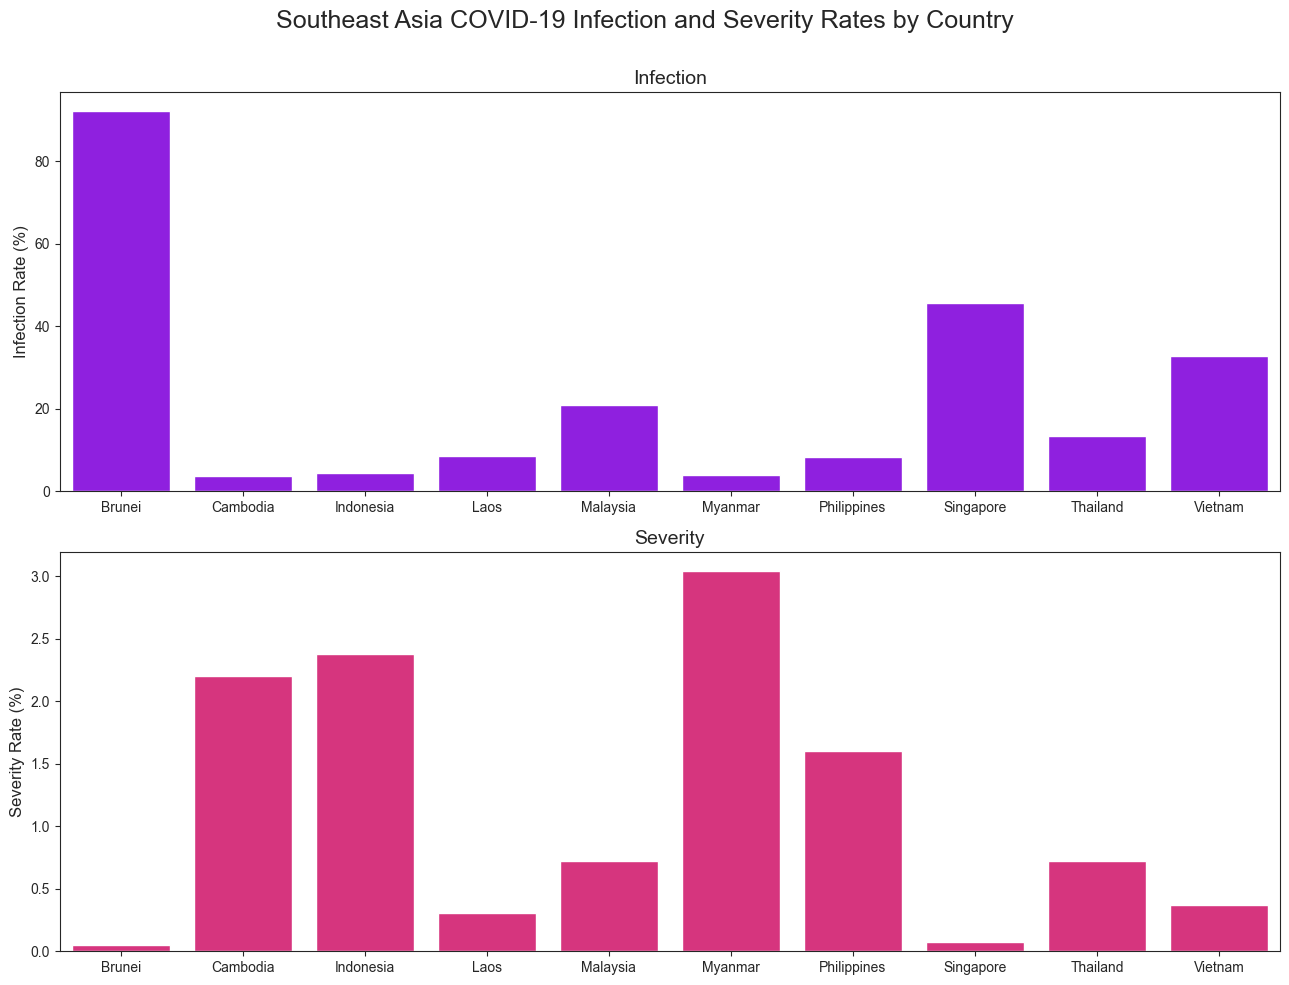

In [23]:
# Create a subplot with 2 column and 1 row
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# Plot infection rate in the first subplot
viz.bar_subplotting(axs[0], sea_country_max, 'infection_rate', '#9400FF', '', 'Infection Rate (%)', 'Infection', 12)

# Plot severity rate in the second subplot
viz.bar_subplotting(axs[1], sea_country_max, 'severity_rate', '#F11A7B', '', 'Severity Rate (%)', 'Severity', 12)

# Set title for the entire figure
plt.suptitle('Southeast Asia COVID-19 Infection and Severity Rates by Country\n', fontsize=18)

# Tight the layout of plot
plt.tight_layout()


4. **What is the impact of vaccination rates on new cases and new deaths across Southeast Asia countries?**

   - To assess the influence of vaccination rates on daily new cases or deaths in Southeast Asian countries, we will use an analysis of variance (ANOVA)
   - We will begin by categorizing Southeast Asian countries into three groups based on their vaccination rates: high, moderate, and low
   >
   >  Null Hypothesis(H0) : No significant difference exists in new cases and new deaths among countries with varying vaccination rates
   > 
   >  Alternative Hypothesis(HA) : A significant difference exists in new cases and new deaths among countries with varying vaccination rates

In [24]:
# Add new column to sea_country_max that looks at total vaccination rate each country
sea_country_max['vaccination_rate'] = sea_covid_df.groupby('country_name')['vaccination_rate'].max().unique()

sea_country_max[['urban_population', 'vaccination_rate']].sort_values(by='vaccination_rate', ascending=False)

,urban_population,vaccination_rate
country_name,,
Brunei,337711,100.480003
Vietnam,35332140,91.940002
Singapore,5703569,91.550003
Cambodia,3924621,91.290001
Malaysia,24475766,82.870003
Thailand,35294600,79.510002
Laos,2555552,78.209999
Myanmar,16674093,74.480003
Indonesia,151509724,73.989998


- Since there are 10 countries in Southeast Asia, we will select 3 countries for each group to ensure that each group has the same length for analysis
  - high_vaccination: 90% vaccination rate or above
  - moderate_vaccination: above 75% vaccination rate
  - low_vaccination: 75% vaccination rate or below

In [25]:
# Variable to call country data from sea_covid_df
sea_country_data = {country: sea_covid_df.loc[sea_covid_df['country_name'] == country] for country in sea_countries}

# Create vaccination rate groups
high_vaccination = sea_country_max[sea_country_max['vaccination_rate'] >= 90].head(3).index
moderate_vaccination = sea_country_max[(sea_country_max['vaccination_rate'] > 75) & (sea_country_max['vaccination_rate'] < 90)].head(3).index
low_vaccination = sea_country_max[sea_country_max['vaccination_rate'] <= 75].head(3).index

# Create array of daily_new_cases from each group
cases_high_vacc = np.concatenate([sea_country_data[country]['daily_new_cases'] for country in high_vaccination])
cases_moderate_vacc = np.concatenate([sea_country_data[country]['daily_new_cases'] for country in moderate_vaccination])
cases_low_vacc = np.concatenate([sea_country_data[country]['daily_new_cases'] for country in low_vaccination])

# Create array of daily_new_deaths from each group
deaths_high_vacc = np.concatenate([sea_country_data[country]['daily_new_deaths'] for country in high_vaccination])
deaths_moderate_vacc = np.concatenate([sea_country_data[country]['daily_new_deaths'] for country in moderate_vaccination])
deaths_low_vacc = np.concatenate([sea_country_data[country]['daily_new_deaths'] for country in low_vaccination])

- Use ``f_oneway`` function from ``scipy.stats`` to conduct ANOVA 

In [26]:
# Perform ANOVA with scipy f_oneway 
f_statistic_cases, p_value_cases = stats.f_oneway(cases_high_vacc, cases_moderate_vacc, cases_low_vacc)
f_statistic_deaths, p_value_deaths = stats.f_oneway(deaths_high_vacc, deaths_moderate_vacc, deaths_low_vacc)

# Define the significance level (alpha)
alpha = 0.05

# Print the result for new cases
print(' Impact of Vaccination Rate on New Cases in Southeast Asia '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nH0: No significant difference exists in new cases among countries with varying vaccination rates')
print('HA: A significant difference exists in new cases among countries with varying vaccination rates')
print('\n+ ANOVA test +')
print(f'\n{"   f-statistic:":<15}{f_statistic_cases:>25}')
print(f'{"   p_value:":<15}{p_value_cases:>25}')
print('\n+ Result +')
if p_value_cases < alpha:
    print("\nReject the null hypothesis (H0) \nA significant difference exists in new cases among countries with varying vaccination rates (HA)")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant difference exists in new cases among countries with varying vaccination rates (H0)")

# Print the result for new deaths
print('')
print(' Impact of Vaccination Rate Impact on New Deaths in Southeast Asia '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nH0: No significant difference exists in new deaths among countries with varying vaccination rates')
print('HA: A significant difference exists in new deahts among countries with varying vaccination rates')
print('\n+ ANOVA test +')
print(f'\n{"   f-statistic:":<15}{f_statistic_deaths:>25}')
print(f'{"   p_value:":<15}{p_value_deaths:>25}')
print('\n+ Result +')
if p_value_cases < alpha:
    print("\nReject the null hypothesis (H0) \nA significant difference exists in new deahts among countries with varying vaccination rates (HA)")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant difference exists in new deaths among countries with varying vaccination rates (H0)")

==================== Impact of Vaccination Rate on New Cases in Southeast Asia =====================

+ Hypothesis testing +

H0: No significant difference exists in new cases among countries with varying vaccination rates
HA: A significant difference exists in new cases among countries with varying vaccination rates

+ ANOVA test +

   f-statistic:       197.07217058319296
   p_value:        5.544743131560664e-85

+ Result +

Reject the null hypothesis (H0) 
A significant difference exists in new cases among countries with varying vaccination rates (HA)

================ Impact of Vaccination Rate Impact on New Deaths in Southeast Asia =================

+ Hypothesis testing +

H0: No significant difference exists in new deaths among countries with varying vaccination rates
HA: A significant difference exists in new deahts among countries with varying vaccination rates

+ ANOVA test +

   f-statistic:        375.3837359658055
   p_value:        5.18434652380177e-159

+ Result +

Rejec

- Let's use violin plot for the visualization

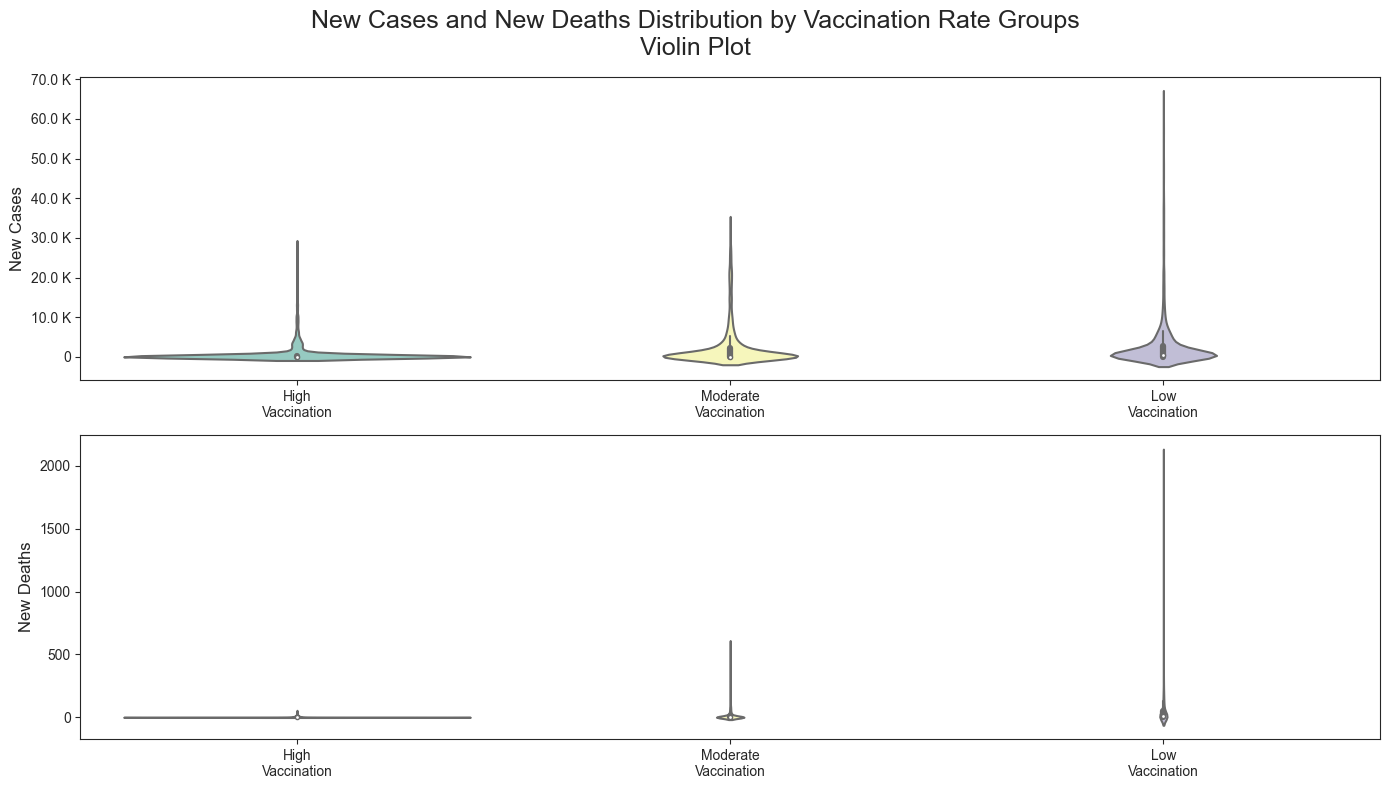

In [27]:
# Create a dictionary with the groups
plot_data = {'group': ['High\nVaccination'] * len(cases_high_vacc) + ['Moderate\nVaccination'] * len(cases_moderate_vacc) + ['Low\nVaccination'] * len(cases_low_vacc),
        'daily_new_cases': np.concatenate([cases_high_vacc, cases_moderate_vacc, cases_low_vacc]),
        'daily_new_deaths': np.concatenate([deaths_high_vacc, deaths_moderate_vacc, deaths_low_vacc])}

# Create a DataFrame from the plot_data
plot_df = pd.DataFrame(plot_data)

fig, axs = plt.subplots(2, 1, figsize=(14, 8))

viz.violin_subplotting(axs[0], plot_df, 'group', 'daily_new_cases', '', 'New Cases', 'Set3', 12)
viz.violin_subplotting(axs[1], plot_df, 'group', 'daily_new_deaths', '', 'New Deaths', 'Set3', 12)

plt.suptitle('New Cases and New Deaths Distribution by Vaccination Rate Groups\nViolin Plot', fontsize=18)

plt.tight_layout()

5. **Are there significant correlations between healthcare indicators (physicians per thousand, life expectancy, out of health pocket health expenditure) and COVID-19 severity rates?**
   
   - To examine the relationship between healthcare indicators and COVID-19 severity, we perform a regression analysis
     >
     > H0: No significant correlation exists between healtcare indicators (physicians per thousand, life expectancy, out of pocket health expenditure) and COVID-19 severity rates
     >
     >HA: A signifanct correlation exists between healthcare indicators (physicians per thousand, life expectancy, out of pocket health expenditure) and COVID-19 severity rates

In [28]:
# Create new dataframe regression analysis
severity_and_health_df = sea_covid_df.groupby('country_name')[['physicians_per_thousand', 'life_expectancy', 'out_of_pocket_health_expenditure']].max()

# Add severity_column from sea_country_max
severity_and_health_df['severity_rate'] = sea_country_max['severity_rate'].unique()

severity_and_health_df

,physicians_per_thousand,life_expectancy,out_of_pocket_health_expenditure,severity_rate
country_name,,,,
Brunei,1.61,75.699997,6.000000,0.052308
Cambodia,0.17,69.599998,59.400002,2.199495
Indonesia,0.43,71.500000,48.299999,2.376454
Laos,0.37,67.599998,45.400002,0.306566
Malaysia,1.51,76.000000,36.700001,0.725172
Myanmar,0.68,66.900002,73.900002,3.039730
Philippines,0.60,71.099998,53.500000,1.598033
Singapore,2.29,83.099998,36.700001,0.071721
Thailand,0.81,76.900002,11.800000,0.724714


- Conduct the analysis with regression analysis from ``OLS`` function from the ``statsmodels``

In [29]:
# Define the independent variable
X1 = sm.add_constant(severity_and_health_df['physicians_per_thousand'])
X2 = sm.add_constant(severity_and_health_df['life_expectancy'])
X3 = sm.add_constant(severity_and_health_df['out_of_pocket_health_expenditure'])

# Define the dependent variable
y = severity_and_health_df['severity_rate']

# Create the regression model
first_model = sm.OLS(y, X1).fit()
second_model = sm.OLS(y, X2).fit()
third_model = sm.OLS(y, X3).fit()

# Determine the r-squared 
first_r_squared = first_model.rsquared
second_r_squared = second_model.rsquared
third_r_squared = third_model.rsquared

# Define the f-statistic
first_f_statistic = first_model.fvalue
second_f_statistic = second_model.fvalue
third_f_statistic = third_model.fvalue

# Define the p_value for each model
first_p_value = first_model.pvalues['physicians_per_thousand']
second_p_value = second_model.pvalues['life_expectancy']
third_p_value = third_model.pvalues['out_of_pocket_health_expenditure']

# Define the significance level (alpha)
alpha = 0.05

# Print the first model
print(' Correlation of Physicians per thousand on Severity Rate in Southeast Asia '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nH0: No significant correlation exists between physicians per thousand and COVID-19 severity rates')
print('HA: A significant correlation exists between physicians per thousand and COVID-19 severity rates')
print('\n+ Regression analysis +')
print(f'\n{"   r-squared:":<15}{first_r_squared:>25}')
print(f'{"   f-statistic:":<15}{first_f_statistic:>25}')
print(f'{"   p_value:":<15}{first_p_value:>25}')
print('\n+ Result +')
if first_p_value < alpha:
    print("\nReject the null hypothesis (H0) \nA significant correlation exists between physicians per thousand and COVID-19 severity rates (HA)\n")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant correlation exists between physicians per thousand and COVID-19 severity rates (H0)\n")

# Print the second model
print('')
print(' Correlation of Life Expectancy on Severity Rate in Southeast Asia '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nH0: No significant correlation exists between life expectancy and COVID-19 severity rates')
print('HA: A significant correlation exists between life expectancy and COVID-19 severity rates')
print('\n+ Regression analysis +')
print(f'\n{"   r-squared:":<15}{second_r_squared:>25}')
print(f'{"   f-statistic:":<15}{second_f_statistic:>25}')
print(f'{"   p_value:":<15}{second_p_value:>25}')
print('\n+ Result +')
if second_p_value < alpha:
    print("\nReject the null hypothesis (H0) \nA significant correlation exists between life expectancy and COVID-19 severity rates (HA)\n")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant correlation exists between life expectancy and COVID-19 severity rates (H0)\n")

# Print the third model
print('')
print(' Correlation of Out of Pocket Health Expenditure on Severity Rate in Southeast Asia '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nH0: No significant correlation exists between out of pocket health expenditure and COVID-19 severity rates')
print('HA: A significant correlation exists between out of pocket health expenditure and COVID-19 severity rates')
print('\n+ Regression analysis +')
print(f'\n{"   r-squared:":<15}{third_r_squared:>25}')
print(f'{"   f-statistic:":<15}{third_f_statistic:>25}')
print(f'{"   p_value:":<15}{third_p_value:>25}')
print('\n+ Result +')
if third_p_value < alpha:
    print("\nReject the null hypothesis (H0) \nA significant correlation exists between out of pocket health expenditure and COVID-19 severity rates (HA)\n")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant correlation exists between out of pocket health expenditure and COVID-19 severity rates (H0)\n")


============ Correlation of Physicians per thousand on Severity Rate in Southeast Asia =============

+ Hypothesis testing +

H0: No significant correlation exists between physicians per thousand and COVID-19 severity rates
HA: A significant correlation exists between physicians per thousand and COVID-19 severity rates

+ Regression analysis +

   r-squared:         0.3624809679154469
   f-statistic:       4.5486449774553135
   p_value:          0.06551132403675154

+ Result +

Fail to reject the null hypothesis(H0) 
No significant correlation exists between physicians per thousand and COVID-19 severity rates (H0)


================ Correlation of Life Expectancy on Severity Rate in Southeast Asia =================

+ Hypothesis testing +

H0: No significant correlation exists between life expectancy and COVID-19 severity rates
HA: A significant correlation exists between life expectancy and COVID-19 severity rates

+ Regression analysis +

   r-squared:         0.4384656526459346
   f

- Visualize the regression model with regression visualization

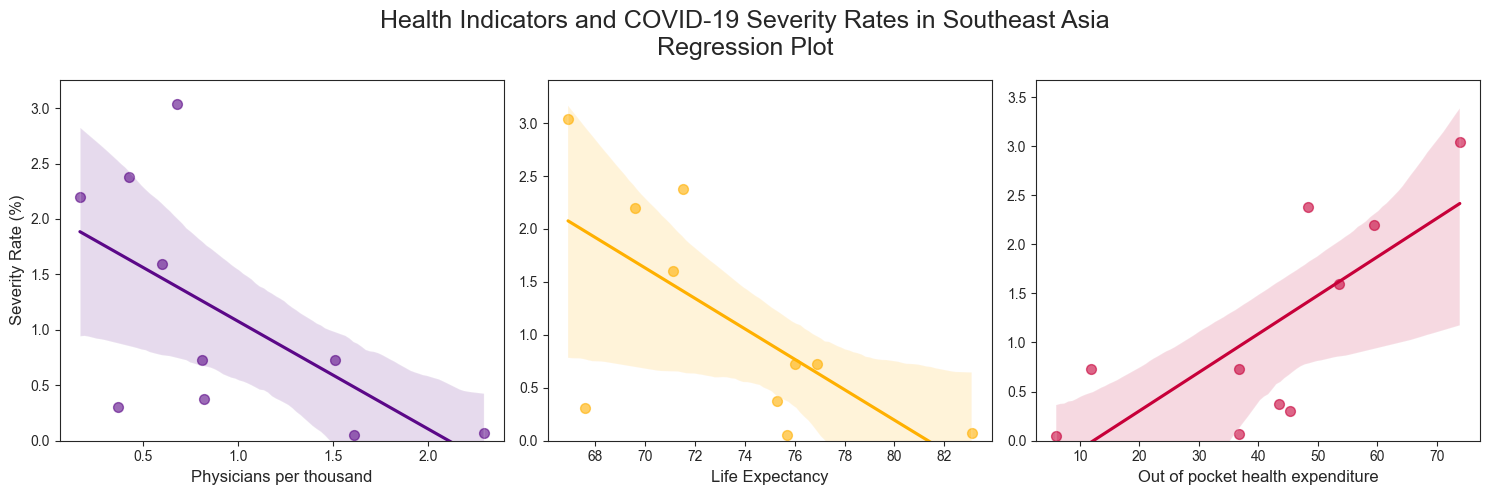

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Use regression plot
viz.reg_subplotting(axs[0], severity_and_health_df, 'physicians_per_thousand', 'severity_rate', 'Physicians per thousand', 'Severity Rate (%)', '#5B0888', 12)
viz.reg_subplotting(axs[1], severity_and_health_df, 'life_expectancy', 'severity_rate', 'Life Expectancy', '', '#FFB000', 12)
viz.reg_subplotting(axs[2], severity_and_health_df, 'out_of_pocket_health_expenditure', 'severity_rate', 'Out of pocket health expenditure', '', '#C70039', 12)

# Set y-axis limit
axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)
axs[2].set_ylim(bottom=0)

# Create the title
plt.suptitle('Health Indicators and COVID-19 Severity Rates in Southeast Asia\nRegression Plot', fontsize=18)

plt.tight_layout()

<a id='summary'></a>
### Summary ~

Here are the key findings and insights:

- COVID-19 trends in Southeast Asia revealed a somewhat unpredictable pattern. Over time, we noticed ups and downs in the number of cases, influenced by various factors at play. At the same time, we observed that the distribution of COVID-19-related deaths follows a more standard pattern
  
- The COVID-19 trends vary significantly among Southeast Asian countries. Some places experienced more significant outbreaks, while others managed to control the situation relatively better
  
- In terms of infection rates and how severe the disease gets, there are variations among Southeast Asian countries. These differences can be linked to factors like the quality of healthcare and other related factors
  
- When we looked into the impact of vaccination rates, we found an interesting connection. Higher vaccination rates appeared to be associated with lower numbers of new cases and reduced COVID-19-related fatalities. This highlights the importance of vaccination efforts in managing the pandemic
  
- We also found meaningful associations between healthcare indicators, such as life expectancy and out-of-pocket healthcare costs, and the severity of COVID-19 in a country. This underscores the critical role of healthcare infrastructure in effectively dealing with the pandemic in Southeast Asia

<a id='reference'></a>
### References ~
Check out the following resources to learn more about the datasets and tools/libraries used in this project:

- **Datasets**:
  
  - WHO-COVID-19-globaldata: https://covid19.who.int/data
  - Covid vaccination: https: https://www.kaggle.com/datasets/rsrishav/covid-vaccination-dataset
  - Countries of the world 2023: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023


- **Libraries**: 
  
  - Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
  - Seaborn user guide: https://seaborn.pydata.org/tutorial.html
  - opendataset Python library: https://github.com/JovianML/opendatasets
  - StatsModels user guide: https://www.statsmodels.org/stable/tsa.html
  - SciPy user guide : https://docs.scipy.org/doc/scipy/tutorial/index.html